# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.display import display

%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS


import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

#cd 'C:\Users\Kevin\Dropbox\Crime KAZK\Processed Data'

df_crime = pd.read_csv("../Processed Data/crime.csv")


df_crime['murder_pc'] = df_crime['murder_fbi'] / df_crime['population_fbi'] * 100000
df_crime['ln_pop'] = np.log(df_crime['population_fbi'])

df_crime['murder_fbi_smallcity'] = df_crime['murder_fbi'].where(df_crime['population_fbi'] < 100000, df_crime['murder_fbi']) 



df_crime.head(20)




,msa_fbi,population_fbi,murder_fbi,year,geoid,murder_pc,ln_pop,murder_fbi_smallcity
0,"Abilene, TX",169885.0,11.0,2016,10180.0,6.474968,12.042877,11.0
1,"Akron, OH",703561.0,41.0,2016,10420.0,5.827498,13.463910,41.0
2,"Albany, GA",152566.0,18.0,2016,10500.0,11.798173,11.935353,18.0
3,"Albany, OR",122030.0,0.0,2016,10540.0,0.000000,11.712022,0.0
4,"Albany-Schenectady-Troy, NY",878166.0,18.0,2016,10580.0,2.049726,13.685591,18.0
5,"Albuquerque, NM",907140.0,75.0,2016,10740.0,8.267743,13.718052,75.0
6,"Alexandria, LA",154032.0,12.0,2016,10780.0,7.790589,11.944916,12.0
7,"Allentown-Bethlehem-Easton, PA-NJ",831770.0,22.0,2016,10900.0,2.644962,13.631311,22.0
8,"Altoona, PA",124942.0,1.0,2016,11020.0,0.800371,11.735605,1.0
9,"Amarillo, TX",263223.0,14.0,2016,11100.0,5.318684,12.480757,14.0


In [3]:

df_full_data = pd.read_csv("../Processed Data/census_fbi_csvmerge.csv")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (38,39,40,41,42,43,44,45,46,47,50,58,59,60,61,63,64,89,90,101,102,104,105,109,110,113,115,123,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,144,146,147,148,149,151,152,158,163,166,168,176,177,178,179,180,183,184,187,189,190,192,193,198,199,200,205,206,207,221,222,223,224,225,226,227,228,229,230,231,232,233,258,348,349,356,357,360,370,375,376,384,387,388,389,390,393,394,398,401,402,403,404,415,417,418,422,429,430,441,442,475,477,478,501,542,553,554,562,564,565,566,567,568,570,571,573,574,576,577,581,582,583,586,587,588,589,592,593,594,595,615,617,622,641,642,643,644,645,646,647,648,649,650,651,652,653,678,768,769,776,777,780,790,795,796,804,807,808,809,810,813,814,818,821,822,823,824,835,837,838,842,849,850,861,862,895,897,898,921,962,973,974,982,984,985,986,987,988,990,991,993,994,996,997,1001,1002,1003,1006,1007,1008,1009,1012,1013,1014,1015,1035,1037,1042,1048,106

In [4]:

df_full_data['murder_pc'] = df_full_data['fbi_murder'] / df_full_data['fbi_pop'] * 100000
df_full_data['ln_pop'] = np.log(df_full_data['fbi_pop'])

df_full_data['murder_fbi_smallcity'] = df_full_data['fbi_murder'].where(df_full_data['fbi_pop'] < 100000, df_full_data['fbi_murder']) 

df_full_data.head(20)

,Geography,Id2,year,id_unique,fbi_pop,fbi_murder,Divorced; Estimate; LABOR FORCE PARTICIPATION - In labor force,Divorced; Estimate; LABOR FORCE PARTICIPATION - Males 16 years and over,Divorced; Margin of Error; LABOR FORCE PARTICIPATION - In labor force,Divorced; Margin of Error; LABOR FORCE PARTICIPATION - Males 16 years and over,...,Women with births in the past 12 months - Percent Distribution; Margin of Error; PUBLIC ASSISTANCE INCOME IN THE PAST 12 MONTHS - Received public assistance income,"Women with births in the past 12 months - Rate per 1,000 women; Estimate; LABOR FORCE STATUS - Women 16 to 50 years","Women with births in the past 12 months - Rate per 1,000 women; Estimate; PUBLIC ASSISTANCE INCOME IN THE PAST 12 MONTHS - Did not receive public assistance income","Women with births in the past 12 months - Rate per 1,000 women; Estimate; PUBLIC ASSISTANCE INCOME IN THE PAST 12 MONTHS - Received public assistance income","Women with births in the past 12 months - Rate per 1,000 women; Margin of Error; LABOR FORCE STATUS - Women 16 to 50 years","Women with births in the past 12 months - Rate per 1,000 women; Margin of Error; PUBLIC ASSISTANCE INCOME IN THE PAST 12 MONTHS - Did not receive public assistance income","Women with births in the past 12 months - Rate per 1,000 women; Margin of Error; PUBLIC ASSISTANCE INCOME IN THE PAST 12 MONTHS - Received public assistance income",murder_pc,ln_pop,murder_fbi_smallcity
0,"Abilene, TX Metro Area",10180,2006,10180_2006,162776.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.686047,12.000130,6.0
1,"Akron, OH Metro Area",10420,2006,10420_2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Albany, GA Metro Area",10500,2006,10500_2006,168071.0,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.544853,12.032142,11.0
3,"Albany-Schenectady-Troy, NY Metro Area",10580,2006,10580_2006,851151.0,18.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.114783,13.654345,18.0
4,"Albuquerque, NM Metro Area",10740,2006,10740_2006,808790.0,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.902187,13.603295,72.0
5,"Alexandria, LA Metro Area",10780,2006,10780_2006,140250.0,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.130125,11.851182,10.0
6,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",10900,2006,10900_2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Altoona, PA Metro Area",11020,2006,11020_2006,126907.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.787979,11.751210,1.0
8,"Amarillo, TX Metro Area",11100,2006,11100_2006,245428.0,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.852160,12.410759,7.0
9,"Ames, IA Metro Area",11180,2006,11180_2006,80377.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.294483,0.0


** Total murders by year **

In [5]:
year_data = df_full_data[['year','fbi_murder']]

year_summary = year_data.groupby('year')

#year_summary.head()

year_totals = year_summary.sum()
year_totals['year'] = year_totals.index

print(year_totals.shape)
year_totals.head()

(11, 2)


,fbi_murder,year
year,,
2006,13980.0,2006
2007,13747.0,2007
2008,12603.0,2008
2009,12239.0,2009
2010,11802.0,2010


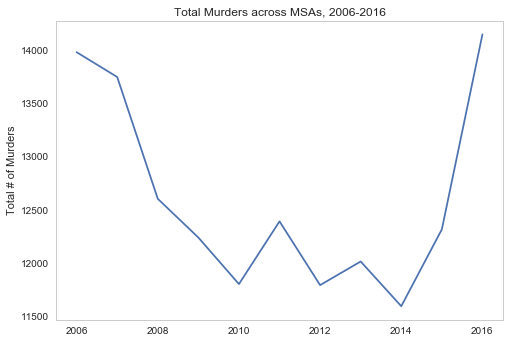

In [6]:
#x = year_totals['year']
#y = year_totals['murder_fbi']

plt.plot('year', 'fbi_murder', data=year_totals)
plt.title('Total Murders across MSAs, 2006-2016')
plt.ylabel('Total # of Murders')
plt.grid()
plt.savefig('../EDA/total_murders')


** Population vs. Murders **

Scatterplot (2016)

(348, 8)


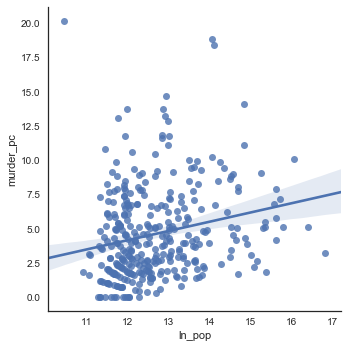

In [7]:
df_2016 = df_crime[df_crime['year'] == 2016]

print(df_2016.shape)
#df_2016.head()

#df_2016['population_fbi'].apply(np.log) # returns DataFrame
#df_2016['murder_fbi'].apply(np.log) # returns DataFrame

#df_2016_short = pd.DataFrame(data=df_2016['murder_fbi'], index=df_2016['population_fbi'])

sns.set(style="white", color_codes=True)

sns.lmplot("ln_pop", "murder_pc", data=df_2016, fit_reg=True)


(348, 8)


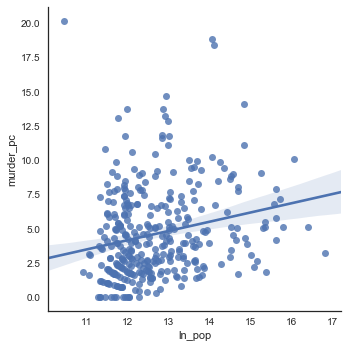

In [8]:
df_2016 = df_crime[df_crime['year'] == 2016]

print(df_2016.shape)

sns.set(style="white", color_codes=True)

g = sns.lmplot("ln_pop", "murder_pc", data=df_2016, fit_reg=True)
g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by pop')


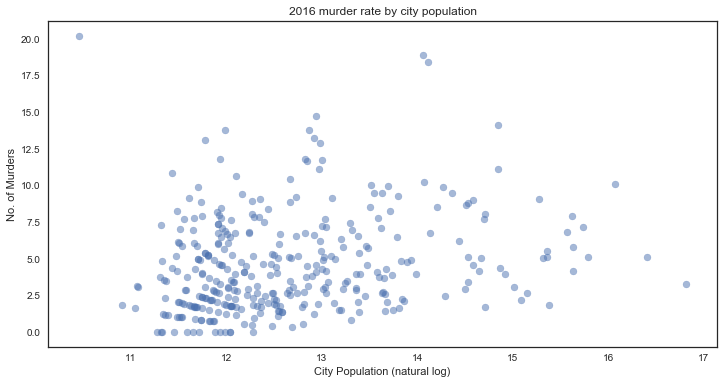

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,6))


#ax = sns.lmplot("population_fbi", "murder_fbi", data=df_2016, fit_reg=True)
ax = plt.scatter(df_2016['ln_pop'], df_2016['murder_pc'], alpha=0.5)
plt.title('2016 murder rate by city population')
plt.xlabel('City Population (natural log)')
plt.ylabel('No. of Murders')
plt.savefig('../EDA/scatter_murder by pop')

#ax.set_title('2016 murder rate by city population')
#ax.set_ylabel('No. of Murders')
#ax.set_xlabel('City Population (natural log)')

### Census Data Analysis

In [32]:
df_2016 = df_full_data[df_full_data['year'] == 2016]

df_eda = pd.DataFrame()

df_eda['geography'] = df_2016['Geography']
df_eda['state'] = df_eda.geography.str.split(",").str[1].str[1:3]


df_eda['murder_total'] = df_2016['fbi_murder']
df_eda['pop_total'] = df_2016['Total; Estimate; Total population']
df_eda['murder_pc'] = df_eda['murder_total'] / df_eda['pop_total'] * 100000


df_eda['ln_pop_total'] = np.log(df_eda['pop_total'])
df_eda['pop_hh'] = df_2016['Total; Estimate; Total households']
df_eda['pop_16over'] = df_2016['Total; Estimate; Total population - SELECTED AGE CATEGORIES - 16 years and over']

df_eda['income_hh_median'] = df_2016['Total; Estimate; Median Household income (dollars)']
df_eda['poverty_rate_18over'] = df_2016['Percent; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Civilian population 18 years and over for whom poverty status is determined - Income in the past 12 months below poverty level']

df_eda['unemployment_16over'] = df_2016['Unemployment rate; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over']

df_eda['demog_sex_ratio'] = df_2016['Total; Estimate; Total population - SUMMARY INDICATORS - Sex ratio (males per 100 females)']
df_eda['demog_child_dep_ratio'] = df_2016['Total; Estimate; Total population - SUMMARY INDICATORS - Child dependency ratio']
df_eda['demog_black'] = df_2016['Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American']
df_eda['demog_amerindian'] = df_2016['Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native']

df_eda['education_over25_lessthanhs'] = df_2016['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Less than high school graduate']
df_eda['pop_over25'] = df_2016['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over']



df_eda.head(5)

,geography,state,murder_total,pop_total,murder_pc,ln_pop_total,pop_hh,pop_16over,income_hh_median,poverty_rate_18over,unemployment_16over,demog_sex_ratio,demog_child_dep_ratio,demog_black,demog_amerindian,education_over25_lessthanhs,pop_over25
3688,"Abilene, TX Metro Area",TX,11.0,170860,6.438019,12.048600,59263.0,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3689,"Akron, OH Metro Area",OH,41.0,702221,5.838618,13.462003,284670.0,NaN,NaN,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3690,"Albany, GA Metro Area",GA,18.0,152506,11.802814,11.934959,57228.0,NaN,NaN,22.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3691,"Albany, OR Metro Area",OR,0.0,122849,0.000000,11.718711,46645.0,NaN,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3692,"Albany-Schenectady-Troy, NY Metro Area",NY,18.0,881839,2.041189,13.689765,343069.0,NaN,65855.0,9.5,NaN,NaN,NaN,7.5,0.3,8.4,603482.0


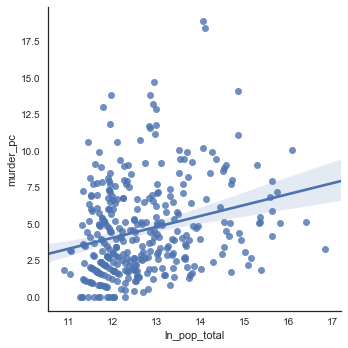

In [33]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("ln_pop_total", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by pop_census')

** Histogram **

(382, 17)


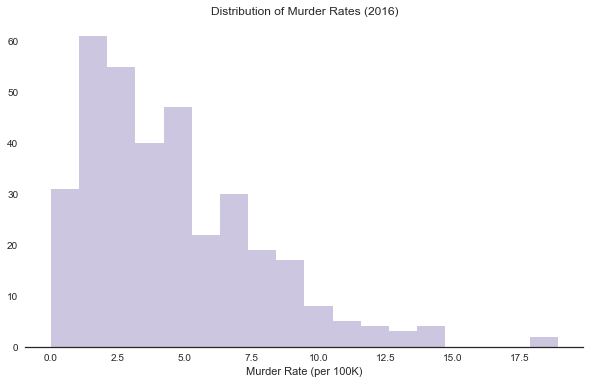

In [11]:
print(df_eda.shape)
df_eda_nomissing = df_eda.dropna(subset=['murder_pc'])


f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.despine(left=True)

sns.distplot(df_eda_nomissing['murder_pc'], kde=False, bins=18, color="m", ax=ax)
ax.set_title("Distribution of Murder Rates (2016)")
ax.set_xlabel("Murder Rate (per 100K)")
f.savefig('../EDA/histogram of murder rate')

In [12]:
g = sns.distplot(df_eda_nomissing['murder_pc'], kde=False, bins=18, color="m", ax=ax)
#ax.set_title("Distribution of Murder Rates (2016)")
#ax.set_xlabel("Murder Rate (per 100K)")
#g.savefig('../EDA/histogram of murder rate')

** Income **

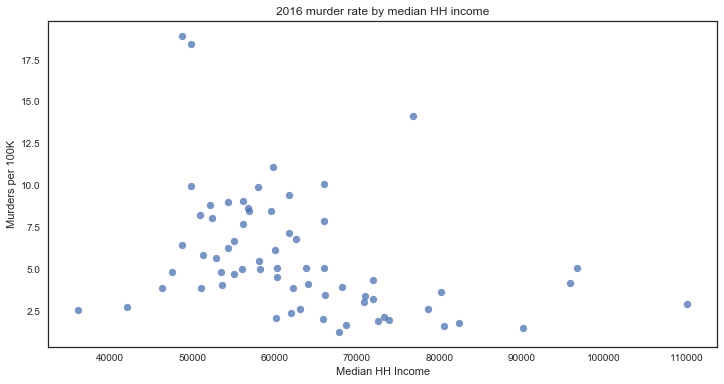

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['income_hh_median'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by median HH income')
plt.xlabel('Median HH Income')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by HH income')

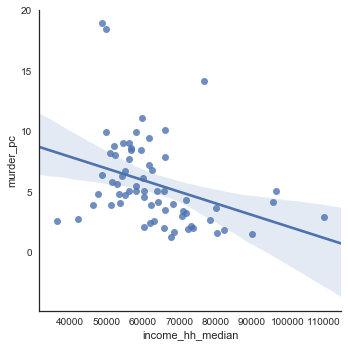

In [14]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("income_hh_median", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by HH income')

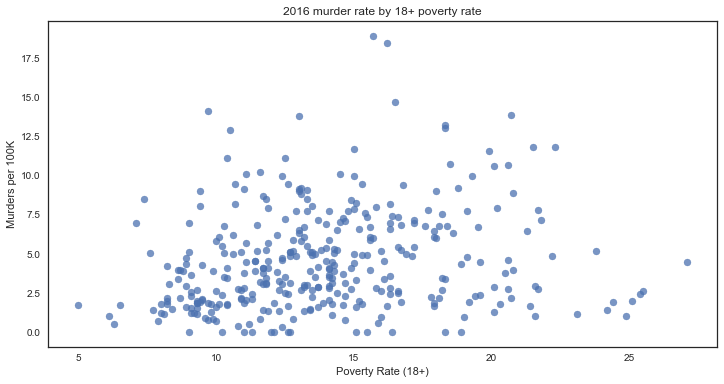

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['poverty_rate_18over'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by 18+ poverty rate')
plt.xlabel('Poverty Rate (18+)')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by poverty rate')

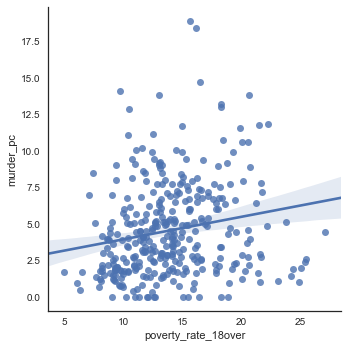

In [16]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("poverty_rate_18over", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by poverty rate')

** Other Demographics **

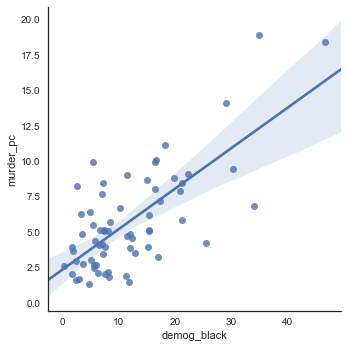

In [17]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("demog_black", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by race=black')

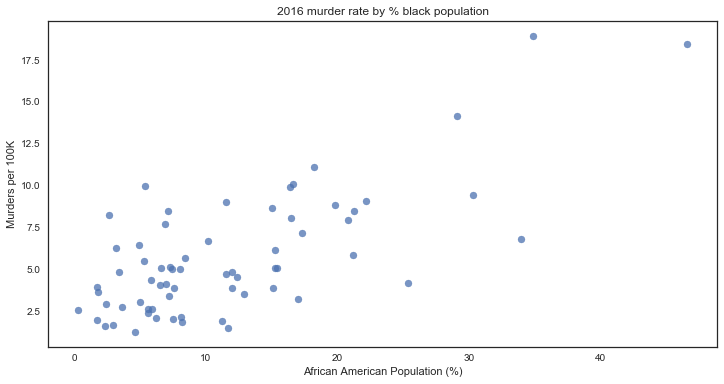

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['demog_black'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by % black population')
plt.xlabel('African American Population (%)')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by race=black')

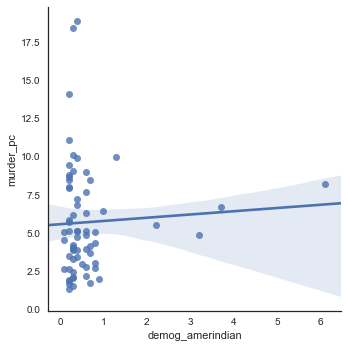

In [19]:
# American Indian

sns.set(style="white", color_codes=True)

g = sns.lmplot("demog_amerindian", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by race=amerindian')

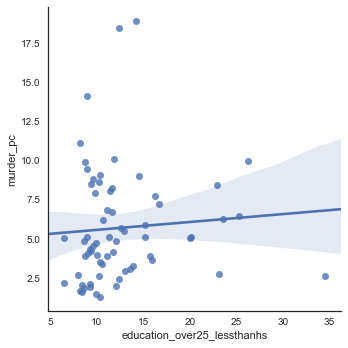

In [20]:
# Less than HS Education (limited data availability)

sns.set(style="white", color_codes=True)

g = sns.lmplot("education_over25_lessthanhs", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by % over 25 lacking HS diploma')

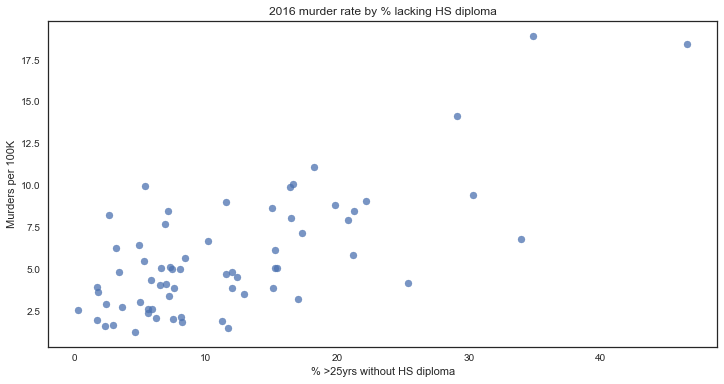

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['demog_black'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by % lacking HS diploma')
plt.xlabel('% >25yrs without HS diploma')
plt.ylabel('Murders per 100K')
plt.savefig('scatter_murder by % over 25 lacking HS diploma')

In [26]:
# only variables with non-missing data (2016)

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'poverty_rate_18over']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     25.27
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           5.71e-11
Time:                        20:08:25   Log-Likelihood:                -877.93
No. Observations:                 348   AIC:                             1762.
Df Residuals:                     345   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -9.9404    

In [25]:
# Including variables with significant missing data (2016)

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'income_hh_median', 'poverty_rate_18over', 'demog_black', 'demog_amerindian', 'education_over25_lessthanhs']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     19.41
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           2.38e-12
Time:                        20:01:25   Log-Likelihood:                -142.03
No. Observations:                  66   AIC:                             298.1
Df Residuals:                      59   BIC:                             313.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [31]:
# Data available for 2006

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'pop_16over', 'demog_sex_ratio', 'demog_child_dep_ratio']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     19.00
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           5.00e-14
Time:                        20:19:14   Log-Likelihood:                -817.68
No. Observations:                 323   AIC:                             1645.
Df Residuals:                     318   BIC:                             1664.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.23

In [ ]:

# census_pop
Total; Estimate; Total households
Total; Estimate; Total population

Total; Estimate; Total population - SELECTED AGE CATEGORIES - 16 years and over
Total; Estimate; Total population - SUMMARY INDICATORS - Sex ratio (males per 100 females)

Total; Estimate; Total population - SUMMARY INDICATORS - Child dependency ratio


# income
Total; Estimate; EARNINGS IN THE PAST 12 MONTHS (IN 2006 INFLATION-ADJUSTED DOLLARS) FOR FULL-TIME, YEAR-ROUND WORKERS - Population 16 years and over with earnings - Median earnings (dollars) for full-time, year-round workers: - Female
Total; Estimate; EARNINGS IN THE PAST 12 MONTHS (IN 2006 INFLATION-ADJUSTED DOLLARS) FOR FULL-TIME, YEAR-ROUND WORKERS - Population 16 years and over with earnings - Median earnings (dollars) for full-time, year-round workers: - Male
Total; Estimate; Median Household income (dollars)
Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Female
Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Male

Percent; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Civilian population 18 years and over for whom poverty status is determined - Income in the past 12 months below poverty level

# unemployment
Unemployment rate; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over
Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed - Percent of civilian labor force



# demographics 
Total; Estimate; Median number of rooms

Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Less than high school graduate
Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over

Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American



